# Step 1 and first 2 datasets 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
msl_test = pd.read_csv("msl_test.csv")
msl_test

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.946958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.942278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.936037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.923557,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.917317,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73724,0.499149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73725,0.501221,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73726,0.501221,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73727,0.501221,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Isolation Forest Anomaly Detection 

In [3]:
msl_test_label = pd.read_csv("msl_test_label.csv")
msl_test_label

,0
0,0
1,0
2,0
3,0
4,0
...,...
73724,0
73725,0
73726,0
73727,0


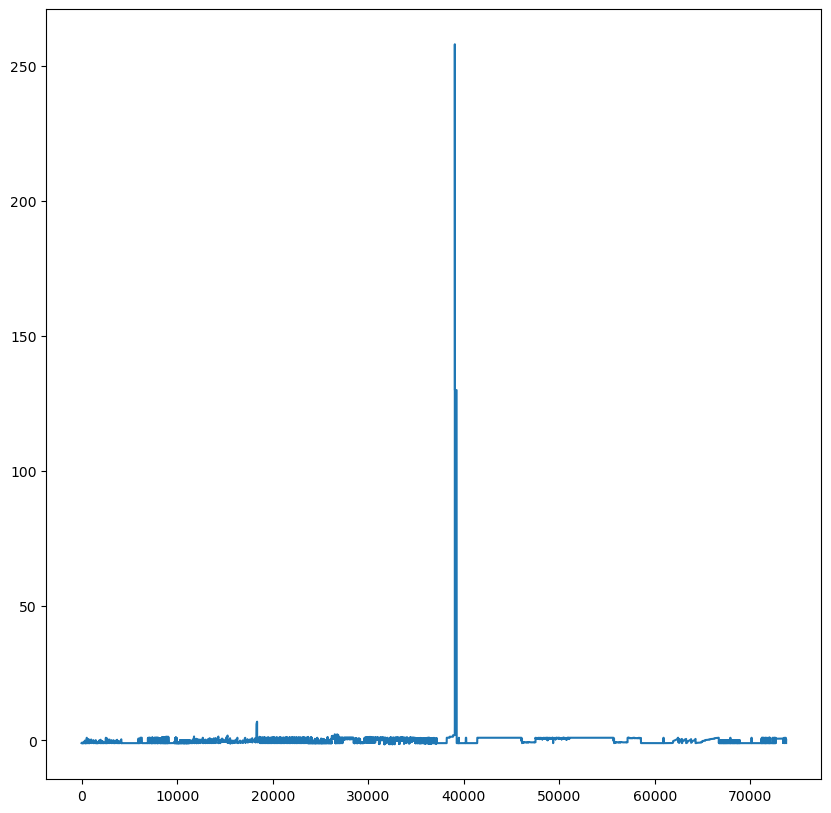

In [4]:
plt.figure(figsize=(10, 10))
plt.plot(msl_test.index, msl_test.iloc[:, 0], label='Time Series Data')

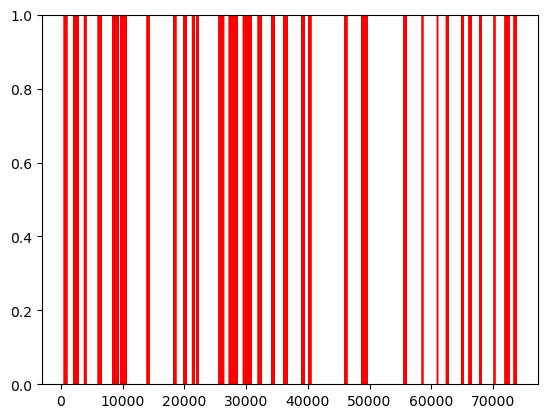

In [18]:
anomaly_indices = msl_test_label[msl_test_label.iloc[:, 0] == 1].index
for idx in anomaly_indices:
    plt.axvspan(idx-0.5, idx+0.5, color='red', alpha=0.3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


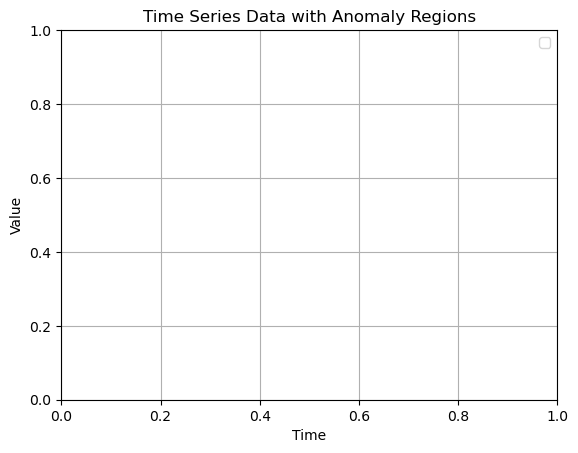

In [19]:
plt.title('Time Series Data with Anomaly Regions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# EDA

Dimensions of the dataset: (73729, 55)
First few rows of the dataset:
           0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  52  \
0 -0.946958  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
1 -0.942278  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
2 -0.936037  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
3 -0.923557  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
4 -0.917317  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   

   53  54  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 55 columns]


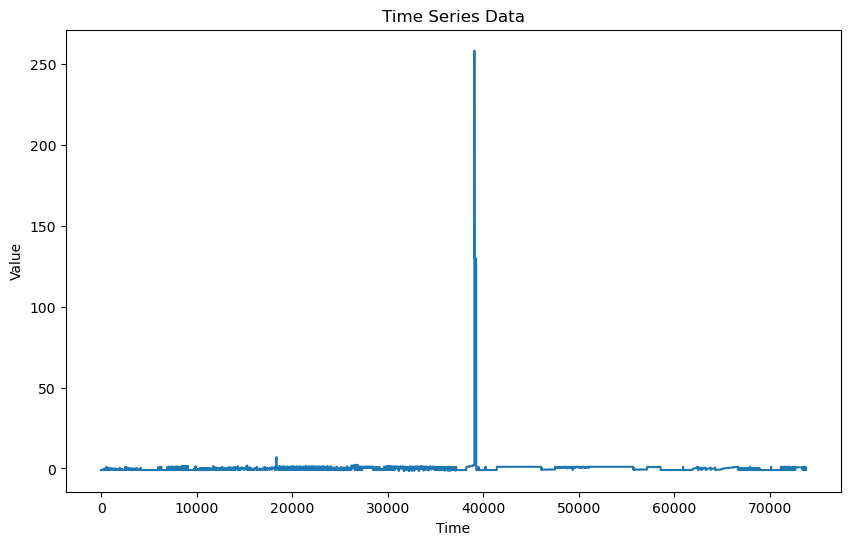

Descriptive statistics:
                   0        1        2        3        4             5  \
count  73729.000000  73729.0  73729.0  73729.0  73729.0  73729.000000   
mean       0.238579      0.0      0.0      0.0      0.0      0.077758   
std        6.626549      0.0      0.0      0.0      0.0      0.267792   
min       -1.424197      0.0      0.0      0.0      0.0      0.000000   
25%       -0.986429      0.0      0.0      0.0      0.0      0.000000   
50%       -0.310727      0.0      0.0      0.0      0.0      0.000000   
75%        0.918899      0.0      0.0      0.0      0.0      0.000000   
max      258.108108      0.0      0.0      0.0      0.0      1.000000   

                  6             7        8             9  ...            45  \
count  73729.000000  73729.000000  73729.0  73729.000000  ...  73729.000000   
mean       0.000543      0.000258      0.0      0.000095  ...      0.000203   
std        0.023286      0.016051      0.0      0.009743  ...      0.014262   
m

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
msl_test = pd.read_csv("msl_test.csv")
msl_test_label = pd.read_csv("msl_test_label.csv")

# Data Inspection
print("Dimensions of the dataset:", msl_test.shape)
print("First few rows of the dataset:\n", msl_test.head())

# Time Series Visualization
plt.figure(figsize=(10, 6))
plt.plot(msl_test.index, msl_test.iloc[:, 0])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Descriptive Statistics
print("Descriptive statistics:\n", msl_test.describe())

# Anomaly Detection
# Perform anomaly detection based on statistical methods or machine learning algorithms

# Root Cause Analysis
# Analyze the data around detected anomalies to identify potential root causes


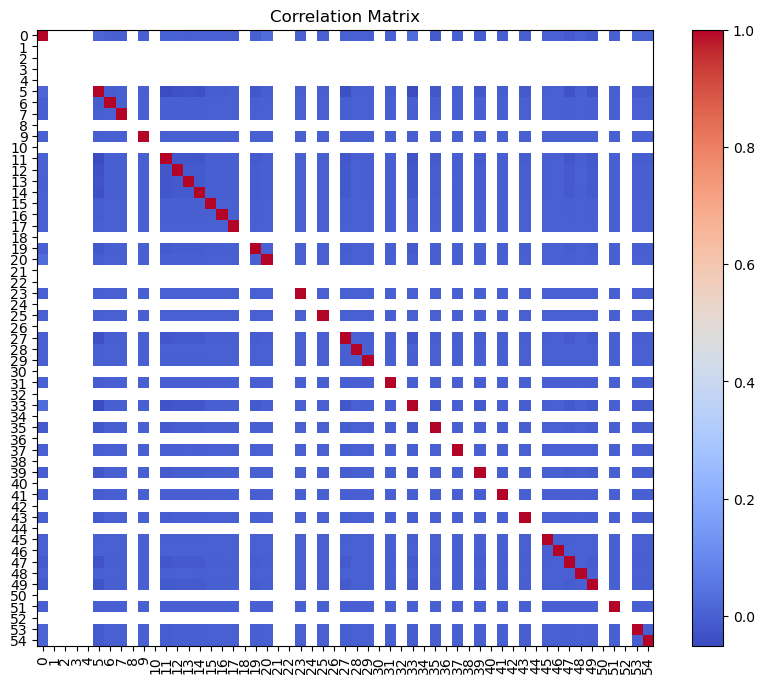

In [22]:
# Compute correlation matrix
correlation_matrix = msl_test.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


In [32]:
import pandas as pd

# Load the dataset
msl_test = pd.read_csv("msl_test.csv")
print("First few rows of the msl_test dataset:")
print(msl_test.head())

# Check for missing values
print("\nMissing values in the msl_test dataset:")
print(msl_test.isnull().sum())

# Check data types
print("\nData types of columns in the msl_test dataset:")
print(msl_test.dtypes)

# Load the labels dataset
msl_test_label = pd.read_csv("msl_test_label.csv")
print("\nFirst few rows of the msl_test_label dataset:")
print(msl_test_label.head())


First few rows of the msl_test dataset:
          0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  52  \
0 -0.946958  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
1 -0.942278  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
2 -0.936037  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
3 -0.923557  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
4 -0.917317  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   

   53  54  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 55 columns]

Missing values in the msl_test dataset:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43   

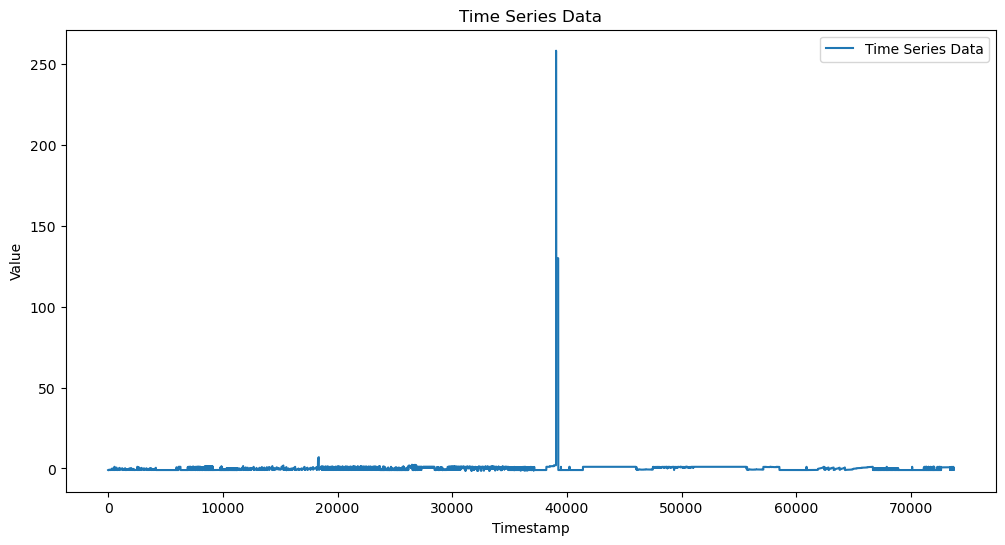

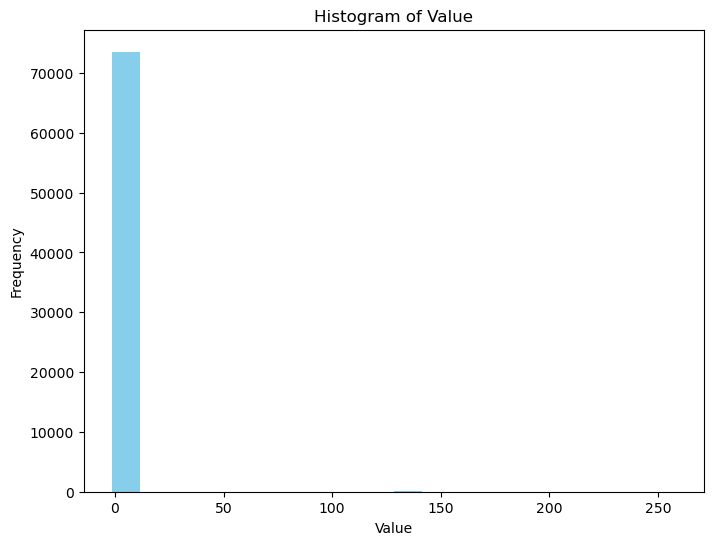

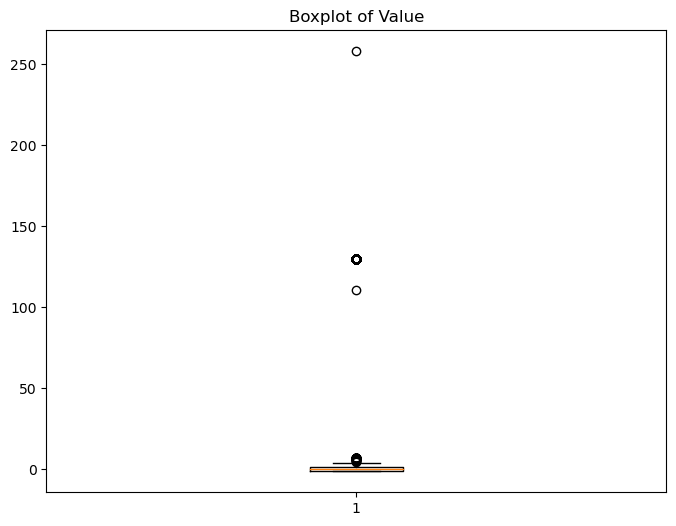

In [34]:
import matplotlib.pyplot as plt

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(msl_test.index, msl_test.iloc[:, 0], label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(msl_test.iloc[:, 0], bins=20, color='skyblue')
plt.title('Histogram of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Use box plot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(msl_test.iloc[:, 0])
plt.title('Boxplot of Value')
plt.show()


In [35]:
# Summary statistics
print("Summary statistics of numerical variables:")
print(msl_test.describe())

# Frequency table for categorical variables (if any)
# Example: pd.crosstab(data['category'], columns='count')


Summary statistics of numerical variables:
                  0        1        2        3        4             5  \
count  73729.000000  73729.0  73729.0  73729.0  73729.0  73729.000000   
mean       0.238579      0.0      0.0      0.0      0.0      0.077758   
std        6.626549      0.0      0.0      0.0      0.0      0.267792   
min       -1.424197      0.0      0.0      0.0      0.0      0.000000   
25%       -0.986429      0.0      0.0      0.0      0.0      0.000000   
50%       -0.310727      0.0      0.0      0.0      0.0      0.000000   
75%        0.918899      0.0      0.0      0.0      0.0      0.000000   
max      258.108108      0.0      0.0      0.0      0.0      1.000000   

                  6             7        8             9  ...            45  \
count  73729.000000  73729.000000  73729.0  73729.000000  ...  73729.000000   
mean       0.000543      0.000258      0.0      0.000095  ...      0.000203   
std        0.023286      0.016051      0.0      0.009743  ... 

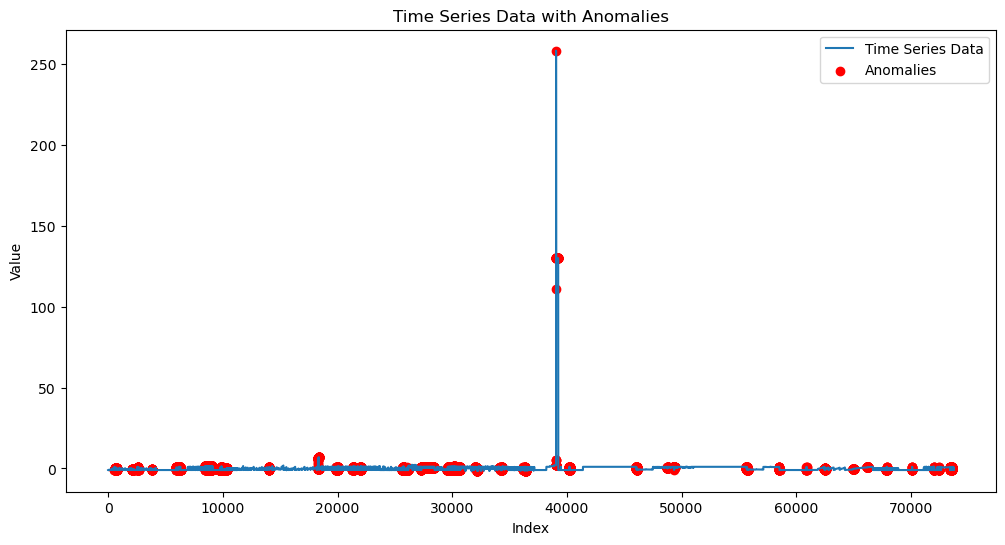

In [36]:
# Assuming anomalies are already labeled in the dataset
# Plot anomalies alongside time series data
plt.figure(figsize=(12, 6))
plt.plot(msl_test.index, msl_test['0'], label='Time Series Data')
plt.scatter(msl_test_label[msl_test_label['0'] == 1].index, msl_test[msl_test_label['0'] == 1]['0'], color='red', label='Anomalies')
plt.title('Time Series Data with Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [37]:
# Create lag features for relevant columns
for column in msl_test.columns:
    msl_test[f'{column}_lag1'] = msl_test[column].shift(1)


In [38]:
# Load the dataset
msl_test = pd.read_csv("msl_test.csv")
print("First few rows of the msl_test dataset:")
print(msl_test.head())

# Load the labels dataset
msl_test_label = pd.read_csv("msl_test_label.csv")
print("\nFirst few rows of the msl_test_label dataset:")
print(msl_test_label.head())

# Correlation analysis
correlation_matrix = msl_test.corr()

# Print correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Extract correlations with the target variable
target_correlation = correlation_matrix['0']  # Assuming '0' is the column containing the target variable
print("\nCorrelation with target variable:")
print(target_correlation)


First few rows of the msl_test dataset:
          0  1  2  3  4  5  6  7  8  9  ...  45  46  47  48  49  50  51  52  \
0 -0.946958  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
1 -0.942278  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
2 -0.936037  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
3 -0.923557  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
4 -0.917317  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   

   53  54  
0   0   0  
1   0   0  
2   0   0  
3   0   0  
4   0   0  

[5 rows x 55 columns]

First few rows of the msl_test_label dataset:
   0
0  0
1  0
2  0
3  0
4  0

Correlation matrix:
           0   1   2   3   4         5         6         7   8         9  ...  \
0   1.000000 NaN NaN NaN NaN  0.011218 -0.000028 -0.002982 NaN -0.000564  ...   
1        NaN NaN NaN NaN NaN       NaN       NaN       NaN NaN       NaN  ...   
2        NaN NaN NaN NaN NaN       NaN       NaN 

# Step 4

Variables with high correlation with the target variable (Anomaly):
Anomaly      1.000000
Feature_1    0.059472
Feature_2    0.048470
Feature_4    0.044521
Feature_3    0.028854
Feature_5   -0.020231
Name: Anomaly, dtype: float64

Feature Importance Scores:
Feature_1    0.205451
Feature_2    0.200463
Feature_3    0.200098
Feature_4    0.197530
Feature_5    0.196458
dtype: float64


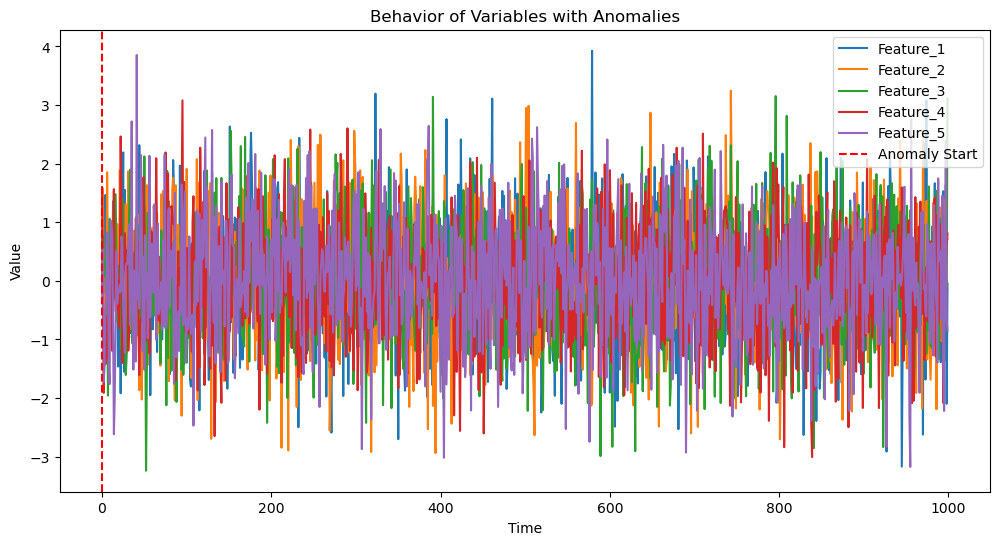


Statistical Test Results (t-test p-values):
{'Feature_1': {'t_statistic': -1.8821251976269682, 'p_value': 0.06010979591662291}, 'Feature_2': {'t_statistic': -1.5330215608811748, 'p_value': 0.12558746619163264}, 'Feature_3': {'t_statistic': -0.9118983551799021, 'p_value': 0.3620424412338056}, 'Feature_4': {'t_statistic': -1.4078691378619088, 'p_value': 0.15948122638660892}, 'Feature_5': {'t_statistic': 0.6392479266544266, 'p_value': 0.5228083502984913}}


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

# Generate random data for demonstration
np.random.seed(42)
n_samples = 1000
n_features = 5
data = np.random.randn(n_samples, n_features)
target = np.random.randint(0, 2, size=n_samples)  # Binary target variable indicating anomalies

# Create a DataFrame
df = pd.DataFrame(data, columns=[f"Feature_{i+1}" for i in range(n_features)])
df['Anomaly'] = target

# Correlation Analysis
correlation_matrix = df.corr()
# Look for variables with high correlations with the target variable
target_correlation = correlation_matrix['Anomaly'].sort_values(ascending=False)
potential_root_causes_corr = target_correlation[(target_correlation > 0.3) | (target_correlation < -0.3)].index.tolist()

print("Variables with high correlation with the target variable (Anomaly):")
print(target_correlation)

# Feature Importance (using Random Forest Classifier as an example)
X = df.drop('Anomaly', axis=1)
y = df['Anomaly']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores:")
print(feature_importance)

# Domain Knowledge (No specific code, rely on expert knowledge)

# Time Lag Analysis (No specific code, analyze time lag between anomalies and variables)

# Visualization (Plot behavior of variables before, during, and after anomalies)
plt.figure(figsize=(12, 6))
for col in df.columns[:-1]:
    plt.plot(df.index, df[col], label=col)
plt.axvline(x=np.where(df['Anomaly'] == 1)[0][0], color='red', linestyle='--', label='Anomaly Start')
plt.title('Behavior of Variables with Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Statistical Testing (Perform t-tests for variables between normal and anomalous periods)
normal_data = df[df['Anomaly'] == 0].drop('Anomaly', axis=1)
anomaly_data = df[df['Anomaly'] == 1].drop('Anomaly', axis=1)
statistical_tests_results = {}
for col in normal_data.columns:
    t_stat, p_value = stats.ttest_ind(normal_data[col], anomaly_data[col])
    statistical_tests_results[col] = {'t_statistic': t_stat, 'p_value': p_value}
print("\nStatistical Test Results (t-test p-values):")
print(statistical_tests_results)

# Iterative Analysis (Continue refining analysis based on insights gained)


### --------------------------------------------------------------------------------------------------------------------- ###

# Dataset 2 

In [48]:
psm_test = pd.read_csv("psm_test.csv")
psm_test

,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
0,132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
1,132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
2,132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
3,132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
4,132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87836,220316.0,0.864548,0.660041,0.590923,0.413322,0.364657,0.380184,0.494318,0.450529,0.382934,...,0.394973,0.386574,0.755608,0.355207,0.835244,0.000000,0.028470,0.164872,0.021786,0.069124
87837,220317.0,0.864483,0.536428,0.590742,0.413331,0.363695,0.378601,0.500000,0.451662,0.377564,...,0.386467,0.381169,0.562101,0.349141,0.490718,0.000000,0.010676,0.157812,0.015251,0.069124
87838,220318.0,0.864644,0.636236,0.590451,0.413619,0.348942,0.377018,0.488636,0.438822,0.373536,...,0.413731,0.377329,0.640556,0.342261,0.700519,0.000000,0.028470,0.163298,0.015251,0.129032
87839,220319.0,0.864553,0.643499,0.590222,0.413689,0.355997,0.379550,0.522727,0.448640,0.374963,...,0.416956,0.378751,0.759744,0.343052,0.828556,0.000000,0.032028,0.150160,0.017429,0.059908


In [49]:
psm_test_label = pd.read_csv("psm_test_label.csv")
psm_test_label

,timestamp_(min),label
0,132480.0,0
1,132481.0,0
2,132482.0,0
3,132483.0,0
4,132484.0,0
...,...,...
87836,220316.0,0
87837,220317.0,0
87838,220318.0,0
87839,220319.0,0


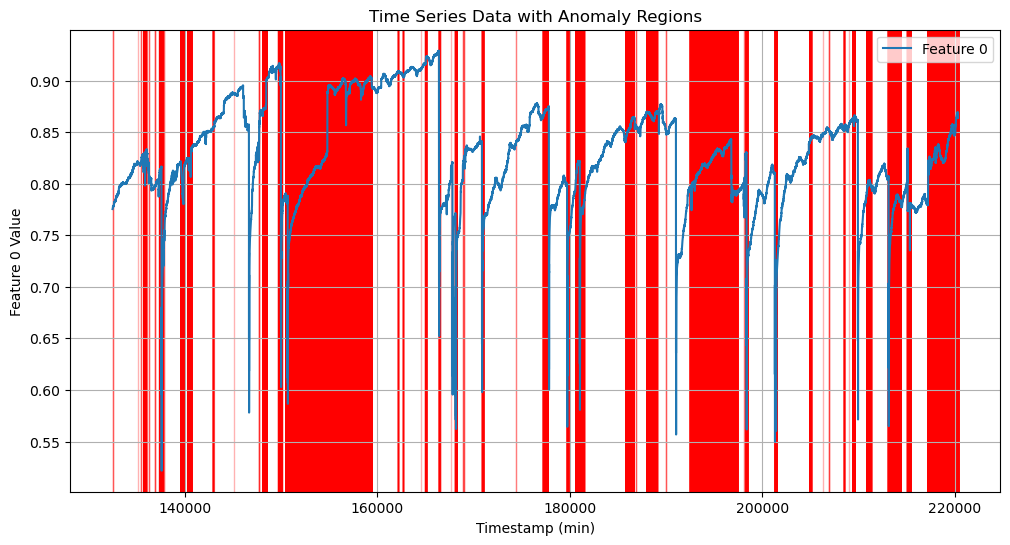

In [51]:
import matplotlib.pyplot as plt

# Plot time series data with anomaly regions
plt.figure(figsize=(12, 6))
plt.plot(psm_test['timestamp_(min)'], psm_test['feature_0'], label='Feature 0')

# Mark anomaly regions
anomaly_indices = psm_test_label[psm_test_label['label'] == 1]['timestamp_(min)']
for idx in anomaly_indices:
    plt.axvspan(idx, idx + 1, color='red', alpha=0.3)  # Assuming each anomaly lasts for 1 minute

plt.title('Time Series Data with Anomaly Regions')
plt.xlabel('Timestamp (min)')
plt.ylabel('Feature 0 Value')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [52]:
# Descriptive Statistics
print("Descriptive statistics:\n", psm_test.describe())

Descriptive statistics:
        timestamp_(min)     feature_0     feature_1     feature_2  \
count     87841.000000  87841.000000  87841.000000  87841.000000   
mean     176400.000000      0.829105      0.857500      0.622801   
std       25357.656835      0.047640      0.073858      0.031606   
min      132480.000000      0.521701      0.387415      0.453511   
25%      154440.000000      0.795859      0.809958      0.604902   
50%      176400.000000      0.825835      0.867525      0.616689   
75%      198360.000000      0.861815      0.914453      0.636475   
max      220320.000000      0.928893      1.000000      0.720898   

          feature_3     feature_4     feature_5     feature_6     feature_7  \
count  87841.000000  87841.000000  87841.000000  87841.000000  87841.000000   
mean       0.652205      0.516833      0.482637      0.539184      0.520756   
std        0.171261      0.077901      0.069440      0.054200      0.069604   
min        0.331163      0.073765      0.11744

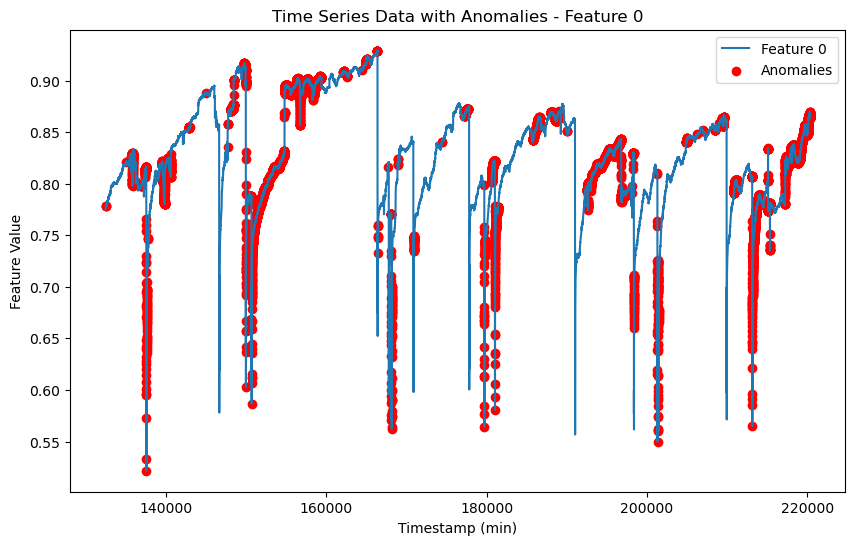

In [53]:
# Anomaly Detection (if labels are available)
# For example, if 'label' column indicates anomalies, you can visualize them
anomalies = psm_test_label[psm_test_label['label'] == 1]['timestamp_(min)']
plt.figure(figsize=(10, 6))
plt.plot(psm_test['timestamp_(min)'], psm_test['feature_0'], label='Feature 0')
plt.scatter(anomalies, psm_test.loc[psm_test_label['label'] == 1, 'feature_0'], color='red', label='Anomalies')
plt.title('Time Series Data with Anomalies - Feature 0')
plt.xlabel('Timestamp (min)')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

### ------------------------------------------------------------------------------ ###

# Dataset 3

In [2]:
import pandas as pd
import numpy as np

In [3]:
smap_test = pd.read_csv("smap_test.csv")
smap_test

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427612,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427613,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427614,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427615,0.995638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
smap_test_label = pd.read_csv("smap_test_label.csv")
smap_test_label

,0
0,0
1,0
2,0
3,0
4,0
...,...
427612,0
427613,0
427614,0
427615,0


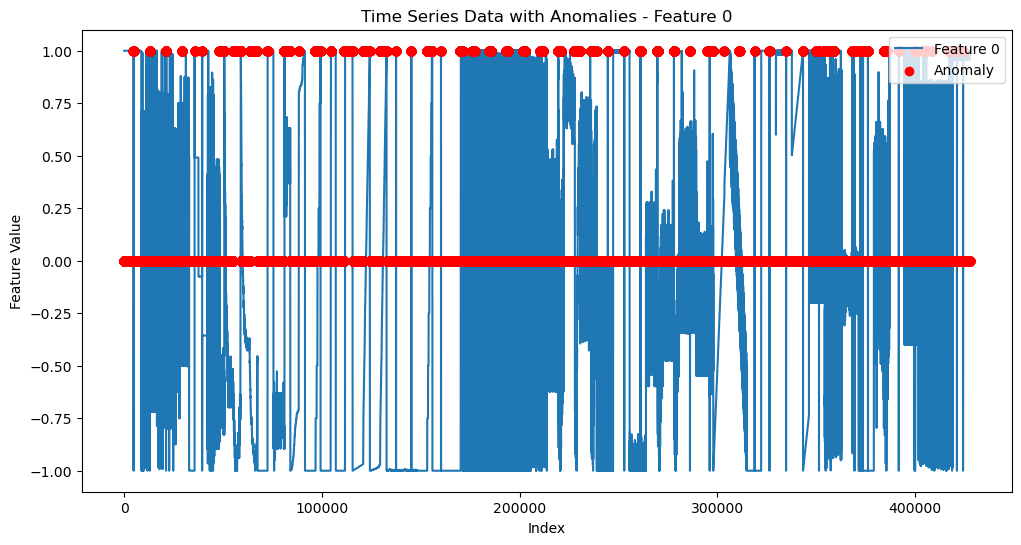

In [6]:
import matplotlib.pyplot as plt

# Time Series Visualization with Anomalies
plt.figure(figsize=(12, 6))
plt.plot(smap_test.index, smap_test['0'], label='Feature 0')
plt.scatter(smap_test_label.index, smap_test_label['0'], color='red', label='Anomaly', zorder=5)
plt.title('Time Series Data with Anomalies - Feature 0')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right')  # Specify the location of the legend
plt.show()


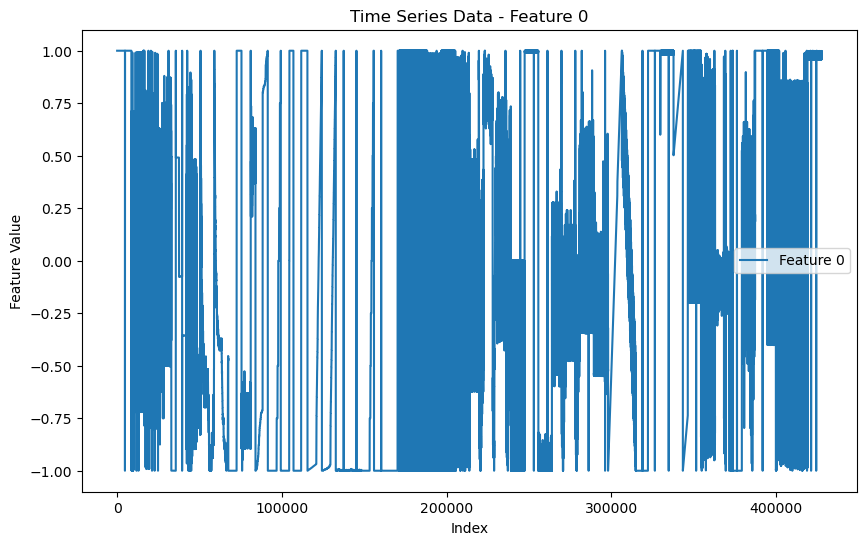

In [7]:
# Time Series Visualization
plt.figure(figsize=(10, 6))
plt.plot(smap_test.index, smap_test['0'], label='Feature 0')
plt.title('Time Series Data - Feature 0')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


In [5]:
# Descriptive Statistics
print("Descriptive statistics:\n", smap_test.describe())


Descriptive statistics:
                    0              1              2              3  \
count  427617.000000  427617.000000  427617.000000  427617.000000   
mean       -0.179944       0.019174       0.003442       0.015392   
std         0.775223       0.137135       0.058570       0.123107   
min        -1.000000       0.000000       0.000000       0.000000   
25%        -0.997772       0.000000       0.000000       0.000000   
50%        -0.358844       0.000000       0.000000       0.000000   
75%         0.666807       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                   4              5              6              7  \
count  427617.000000  427617.000000  427617.000000  427617.000000   
mean        0.000313       0.090146       0.068957       0.000664   
std         0.017699       0.286391       0.253381       0.025762   
min         0.000000       0.000000       0.000000       0.000000   
25%     

C:\Users\trupti kanade\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


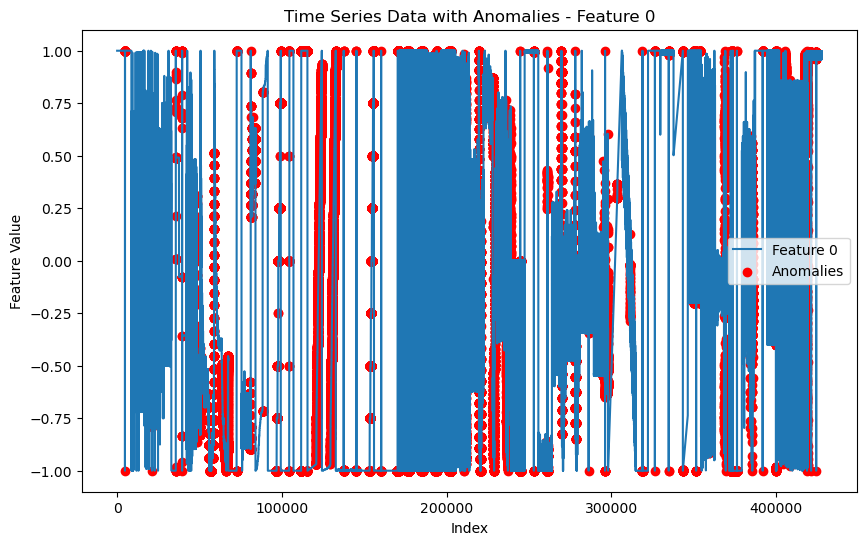

In [6]:
# Anomaly Detection (if labels are available)
# For example, if 'label' column indicates anomalies, you can visualize them
anomalies = smap_test_label[smap_test_label['0'] == 1].index
plt.figure(figsize=(10, 6))
plt.plot(smap_test.index, smap_test['0'], label='Feature 0')
plt.scatter(anomalies, smap_test.loc[anomalies, '0'], color='red', label='Anomalies')
plt.title('Time Series Data with Anomalies - Feature 0')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

In [7]:
correlation_matrix = smap_test.corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
            0         1         2         3         4         5         6  \
0   1.000000  0.002954  0.012724 -0.002291  0.007734  0.066477  0.071336   
1   0.002954  1.000000  0.420357  0.802004  0.115068  0.402569  0.058392   
2   0.012724  0.420357  1.000000  0.015679  0.136566  0.172219  0.197838   
3  -0.002291  0.802004  0.015679  1.000000  0.141603  0.391052 -0.023306   
4   0.007734  0.115068  0.136566  0.141603  1.000000  0.056248  0.065056   
5   0.066477  0.402569  0.172219  0.391052  0.056248  1.000000  0.864600   
6   0.071336  0.058392  0.197838 -0.023306  0.065056  0.864600  1.000000   
7  -0.001143  0.029492  0.046529  0.007100 -0.000456  0.020411  0.019495   
8   0.002864  0.036000  0.088032 -0.001742 -0.000247  0.038990  0.045235   
9   0.001752  0.122769  0.003513  0.031325 -0.000311  0.010273 -0.003731   
10  0.002910  0.015468  0.036797 -0.000270 -0.000038  0.006871  0.007947   
11 -0.003105  0.006287  0.003434  0.005437 -0.000435  0.012551  0.0

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind



# Feature Importance with Random Forest
X = smap_test.values
y = smap_test_label.values.ravel()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

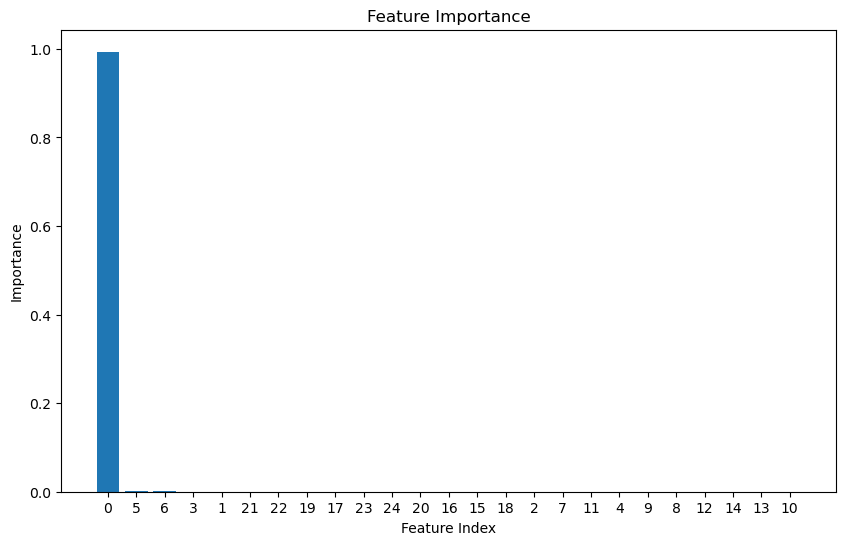

In [9]:
# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), sorted_idx)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


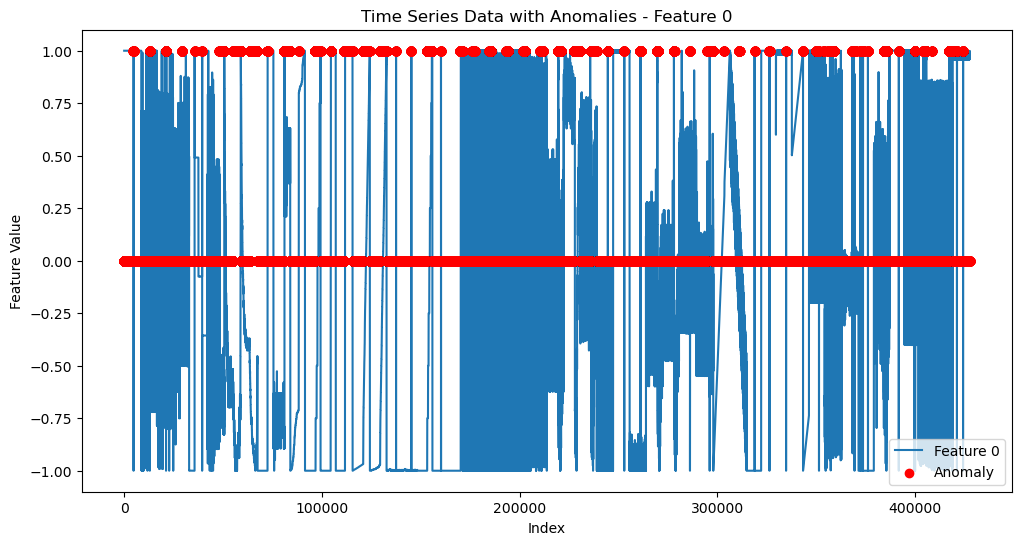

In [8]:
import matplotlib.pyplot as plt

# Time Series Visualization with Anomalies
plt.figure(figsize=(12, 6))
plt.plot(smap_test.index, smap_test['0'], label='Feature 0')
plt.scatter(smap_test_label.index, smap_test_label['0'], color='red', label='Anomaly', zorder=5)
plt.title('Time Series Data with Anomalies - Feature 0')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


In [10]:
from scipy.stats import ttest_ind

# Statistical Testing (t-tests) to compare variables between normal and anomalous periods
normal_data = smap_test[smap_test_label['0'] == 0]
anomaly_data = smap_test[smap_test_label['0'] == 1]

p_values = []
for feature in smap_test.columns:
    t_stat, p_value = ttest_ind(normal_data[feature], anomaly_data[feature])
    p_values.append(p_value)


In [11]:
# Significant features based on p-values (adjust alpha as needed)
significant_features = [feature for feature, p_value in zip(smap_test.columns, p_values) if p_value < 0.05]
print("Significant features based on t-tests:", significant_features)

Significant features based on t-tests: ['0', '1', '2', '3', '5', '6', '7', '11', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']


### ------------------------------------------------------------------------------------------------------------------ ###

# Dataset 4

In [12]:
test = pd.read_csv("test.csv")
test

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.0,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0
1,0.000000,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.0,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0
2,0.000000,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.0,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0
3,0.000000,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.0,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0
4,0.000000,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.0,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,0.062500,0.047847,0.041333,0.048338,0.0,0.209877,0.266667,0.0,0.005937,0.0,...,0.0,0.00,0.035395,0.001223,0.0,0.027778,0.671429,0.681159,0.0,0.0
69997,0.052083,0.031100,0.036000,0.046828,0.0,0.209877,0.250000,0.0,0.003675,0.0,...,0.0,0.00,0.044729,0.001223,0.0,0.055556,0.671429,0.681159,0.0,0.0
69998,0.052083,0.021531,0.034667,0.045317,0.0,0.211934,0.266667,0.0,0.007351,0.0,...,0.0,0.00,0.050604,0.001223,0.0,0.055556,0.685714,0.681159,0.0,0.0
69999,0.052083,0.039474,0.038667,0.045317,0.0,0.211934,0.266667,0.0,0.005089,0.0,...,0.0,0.00,0.044377,0.001223,0.0,0.027778,0.671429,0.681159,0.0,0.0


In [13]:
test_label = pd.read_csv("test_label.csv")
test_label

,0
0,0
1,0
2,0
3,0
4,0
...,...
69996,0
69997,0
69998,0
69999,0


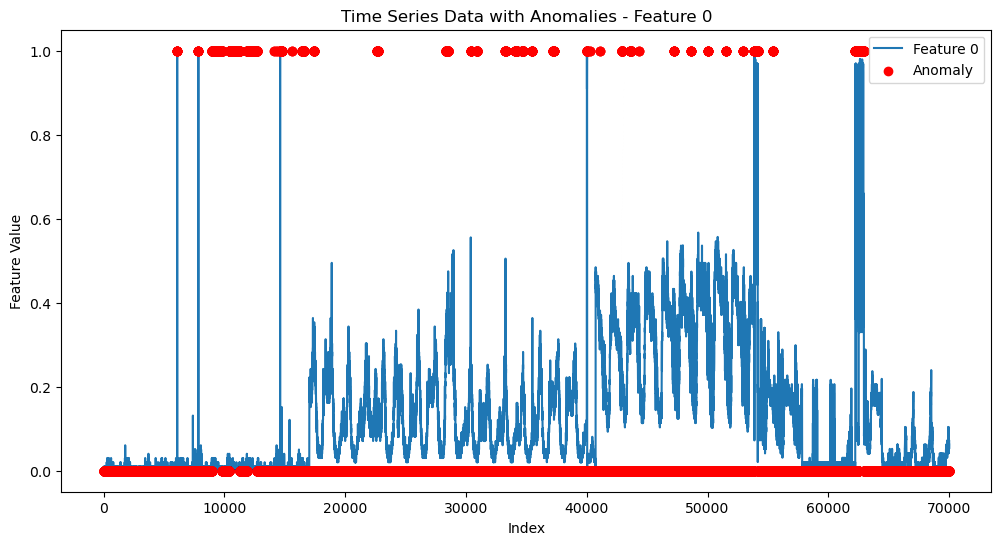

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# a) Read test and label files
test = pd.read_csv("test.csv")
test_label = pd.read_csv("test_label.csv")

# b) Draw time series plots with anomaly regions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['0'], label='Feature 0')
plt.scatter(test_label.index, test_label['0'], color='red', label='Anomaly', zorder=5)
plt.title('Time Series Data with Anomalies - Feature 0')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# c) Perform EDA and find out root cause
# Your exploratory data analysis code goes here

# d) Find out the variables which are the root cause for the anomaly
# Your root cause analysis code goes here


In [ ]:
# EDA: Exploratory Data Analysis

# 1. Summary Statistics
summary_stats = test.describe()
print("Summary Statistics:\n", summary_stats)

In [ ]:
# 2. Data Visualization
import seaborn as sns

# Pairplot to visualize pairwise relationships between variables
sns.pairplot(test)
plt.title('Pairplot of Features')
plt.show()


In [ ]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=test)
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 3. Correlation Analysis
correlation_matrix = test.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 4. Distribution of Anomalies
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=test_label)
plt.title('Distribution of Anomalies')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

In [41]:
#print(psm_test.head())

In [40]:
#print(psm_test.info())